# Text Analytics: Preprocessing & Word Distributions

The below code helps the user in performing the text cleaning activities and gives a word count distribution plot. There are many ways to do the same tasks, but I have kept it simple and flexible. 

Pre-requisites: 
1. Using python 3.6 via Anaconda distribution
2. If you haven't downloaded already, use the command nltk.download("stopwords")

Basic Approach:
1. Read the text from a file
2. Remove the spaces, new line characters and covert the text into lower case
3. Split the text into tokens
4. Remove the stopwords
5. Count the words

Important Note:

In the above approach,stemming and lemmatization tasks are missing. These tasks are considered to be most common tasks in text analytics. In my line of work, my use cases require an exploratory analysis without those two tasks. In other repos, where I performed LDA analysis, you would see the code that performs stemming and lemmatization.


In [ ]:
#nltk.download("stopwords")

In [240]:
%matplotlib inline
import collections
import string
import nltk
import matplotlib.pyplot as plt
from nltk import WordNetLemmatizer

The below code is reading the entire text document into a list. Since we are using with, "with" there is no need to close the file.

In [241]:
with open("C:/path/Gilmore.txt") as t:
    SampleText = t.readlines()

In [242]:
def pre_process(document):
    document = [a.strip().rstrip().lower() for a in SampleText]
    document= "".join(a for a in document)
    document = "".join(a for a in document if a not in (",","-","?","!",":","."))
    document = document.split(" ")
    document =[a for a in document if a not in stopwords.words("english")]
    c = collections.Counter(document)
    return c

The pre_process function takes the list in which the text file has been loaded and returns the word count in tuples.The above function performs all the tasks outlined in the basic approach in a step by step manner. The alternate ways to remove punctuation is to use "maketrans". The method that I followed is more flexible. Sometimes, I need the "-" separators depending on the use case that I run. Hence, followed the list approach. 

In [243]:
V = pre_process(SampleText)

In [244]:
C20 = V.most_common(20)

In [245]:
print(C20)

[('', 94), ("i'm", 36), ("it's", 34), ('rory', 30), ("you're", 27), ('school', 25), ("don't", 23), ('go', 22), ('one', 22), ('good', 21), ('know', 21), ('get', 21), ('like', 21), ("that's", 16), ('really', 16), ('got', 16), ('going', 15), ('lorelai', 15), ('see', 14), ('take', 14)]


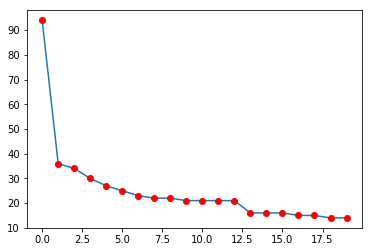

In [246]:
x_val = [x for x in range(len(C20))]
y_val = [y[1] for y in C20]
plt.plot(x_val,y_val)
plt.plot(x_val,y_val,'or')
plt.show()

Note: If your graph does not show up, then most probably you are missing the line %matplotlib inline in your code. The axis and scaling can be fixed as per your needs. This graph is basically to check the word distributions and investigate any anomalies